In [1]:
print("Hellow World")

Hellow World


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("file:///C:/Users/asus/Downloads/archive.zip")

In [5]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
df.shape

(30, 3)

In [13]:
df = df.drop('Unnamed: 0',axis=1)

In [23]:
df.duplicated().sum()

0

In [24]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [25]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [14]:
df.head(2)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0


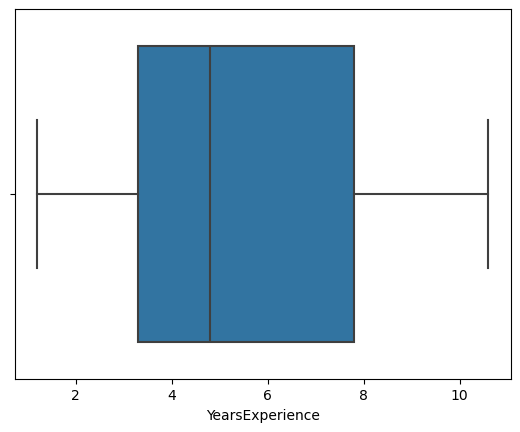

In [15]:
sns.boxplot(data=df,x="YearsExperience")
plt.show()

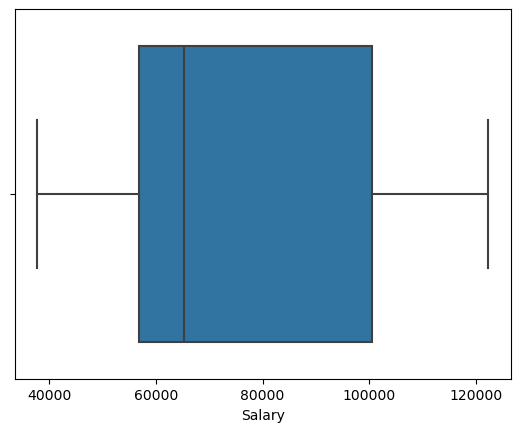

In [26]:
sns.boxplot(data=df,x="Salary")
plt.show()

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


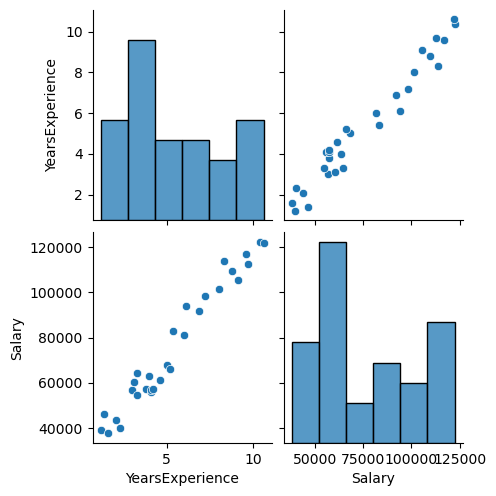

In [29]:
sns.pairplot(df)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [32]:
X = df.drop(["YearsExperience"],axis =1)
y = df['Salary']

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=True)

In [40]:
print(x_train.shape)
print(y_test.shape)

(24, 1)
(6,)


In [51]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
ŷ_train=model.predict(x_train)
ŷ_test=model.predict(x_test)
print("coefficient:",model.coef_)
print("inercept:",model.intercept_)
from sklearn.model_selection import cross_val_score
print("cv",cross_val_score(model,X,y,cv=5).mean())

coefficient: [1.]
inercept: -2.9103830456733704e-11
cv 1.0


In [45]:
ŷ_train

array([116970.,  43526., 109432., 101303., 113813.,  39892.,  37732.,
       105583.,  60151.,  81364.,  57082.,  54446., 112636.,  46206.,
        66030.,  39344.,  67939., 121873., 122392.,  57190.,  64446.,
        56958.,  55795.,  56643.])

In [46]:
ŷ_test

array([83089., 98274., 63219., 93941., 61112., 91739.])

In [57]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,ŷ_test)
from math import sqrt
print("train_r2",model.score(x_train,y_train))
print("test_r2",model.score(x_test,y_test))

train_r2 1.0
test_r2 1.0


In [58]:
error=ŷ_test-y_test
error

17    1.455192e-11
21    1.455192e-11
10    0.000000e+00
19    1.455192e-11
14    0.000000e+00
20    1.455192e-11
Name: Salary, dtype: float64

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


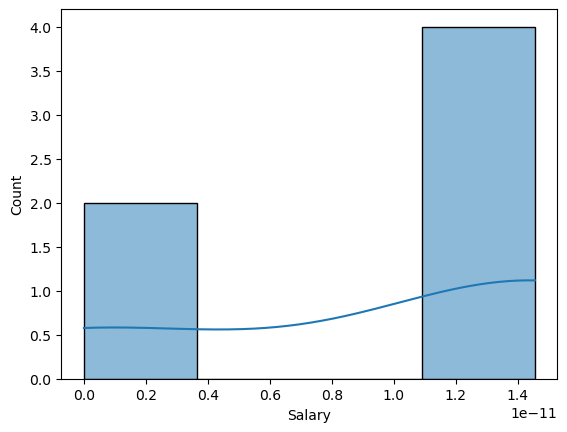

In [60]:
sns.histplot(error,kde=True)
plt.show()

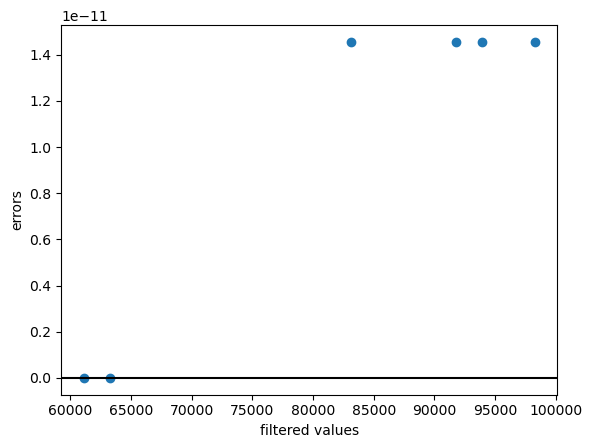

In [62]:
plt.scatter(ŷ_test,error)
plt.axhline(y=0,color="black")
plt.xlabel("filtered values")
plt.ylabel("errors")
plt.show()

In [64]:
import statsmodels.formula.api as smf
r=smf.ols("y~x",data=df).fit() #oridinary least square
r.summary()

PatsyError: Error evaluating factor: NameError: name 'x' is not defined
    y~x
      ^